### 금융 시장의 수익률 (Financial Market Return)
- 일반적으로 금융 시장을 분석하거나 머신러닝 모델을 구축할 때 price가 아닌 return을 활용하는 경우가 많다.
- 수익률을 통해 복리계산과 연율화(1년 간의 성장률)등을 위해 무수히 많은 반복 계산을 하게 되므로  
  (1 + return)으로 계산할 경우 복잡하고 번거로워진다.
- 기존 return에 log를 취해주면, 더 편한 계산이 가능해지지만 당연히 약간의 오차는 발생하게 된다.
- 약간의 오차를 감수하고 로그를 사용함으로써 얻은 이득이 훨씬 많고, 국내 주식에서의 상한선과 하한선은 -30% ~ 30% 제약까지 있기 때문에 일반적인 주가 움직임에 대해 오차가 극히 적다.
- 즉, 로그를 취하는 것은 정밀성보다 편의성을 높인 것으로 이해하면 된다.
- 수익률 단위가 분, 초, 밀리초 이하로 내려가야 정밀성에 차이가 많이 발생하지만, 실제 금융시장에서는  
  최소 하루 단위 이상으로 계산하기 때문에 오차가 거의 발생하지 않게 된다.
- 또한, return에 로그를 취하면 우측으로 치우친 확률 분포를 중심으로 재조정해주는 효과까지 있기 때문에 안쓸 이유가 없다.

<img src='./images/log_return.png'>

In [4]:
import yfinance as yf

# VIX는 투자자들이 향후 30일간 S&P 500지수가 얼마나 변동할 것인지를 반영한 지수이다
# 투자자들이 투자 결정을 내리기 전에 시장 리스크, 공포 및 스트레스를 측정하는 데 사용한다.
columns = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS', 'SPY', '^SPX', '^VIX', 'EURUSD=X', '^XAU', 'GDX', 'GLD']

f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  12 of 12 completed


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6214,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-07,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,195.8700,181.2800,1.0882,34.7900,217.82,461.6800,30.7800,424.0100,534.6700,5354.0298,12.63,140.83
2024-06-06,194.4800,185.0000,1.0875,36.0100,219.43,458.1000,30.4200,424.5200,534.6600,5352.9600,12.58,145.38
2024-06-07,196.8900,184.3000,1.0894,33.5400,211.60,454.9100,30.7400,423.8500,534.0100,5346.9902,12.22,136.20


In [5]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3768 entries, 2010-01-01 to 2024-06-11
Freq: B
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AAPL      3633 non-null   float64
 1   AMZN      3633 non-null   float64
 2   EURUSD=X  3763 non-null   float64
 3   GDX       3633 non-null   float64
 4   GLD       3633 non-null   float64
 5   GS        3633 non-null   float64
 6   INTC      3633 non-null   float64
 7   MSFT      3633 non-null   float64
 8   SPY       3633 non-null   float64
 9   ^SPX      3633 non-null   float64
 10  ^VIX      3633 non-null   float64
 11  ^XAU      3633 non-null   float64
dtypes: float64(12)
memory usage: 382.7 KB


In [6]:
# 참고
# 인덱스를 원하는 컬럼으로 변경한 뒤, DatetimeIndex으로 변환
# pd.read_scv('path', index_col='날짜 컬럼명', parse_date=True)

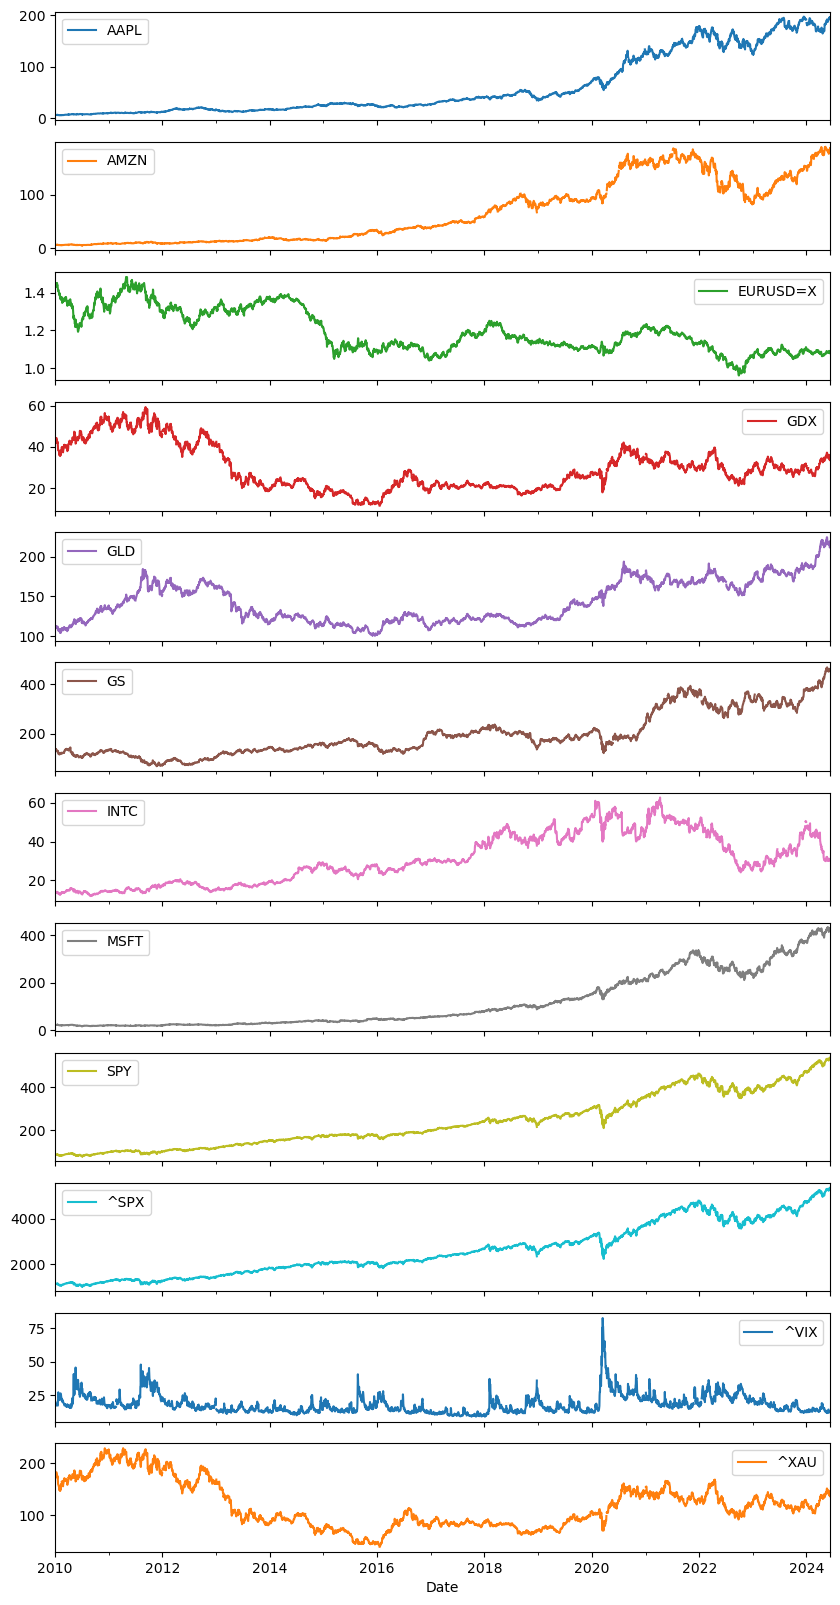

In [7]:
import matplotlib.pyplot as plt

f_df.plot(figsize=(10, 20), subplots= True)
plt.show()

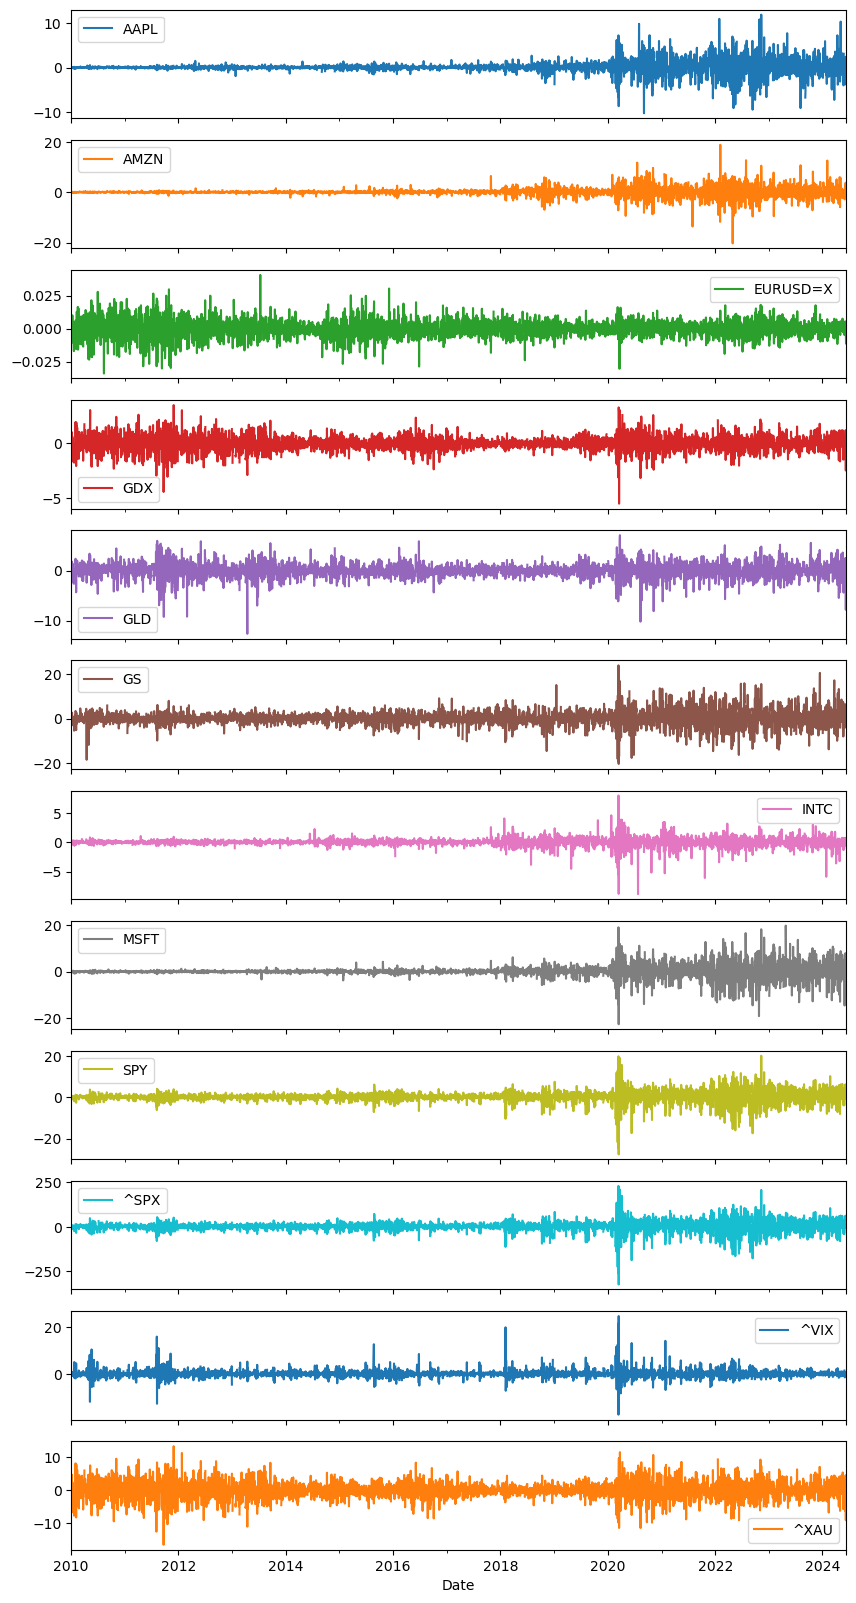

In [8]:
f_df.diff().plot(figsize=(10, 20), subplots= True)
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_40872/1490754999.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  f_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)


<Axes: xlabel='Ticker'>

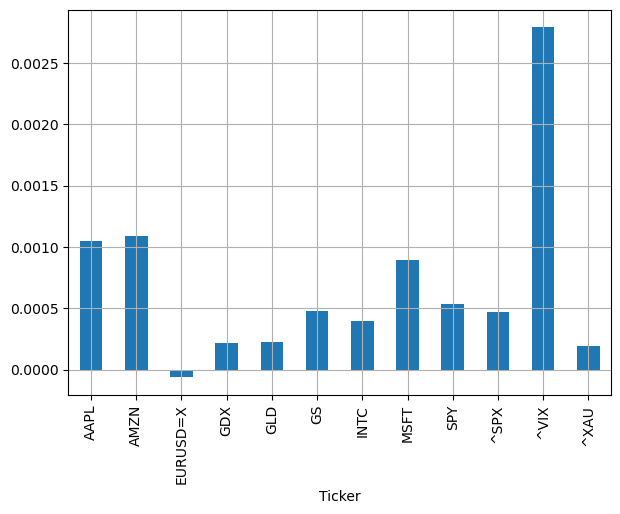

In [11]:
# 변화율 확인
f_df.pct_change().mean().plot(kind='bar',figsize=(7,5), grid=True)

In [14]:
# 수익률을 구히기 위해 shift 를 사용해서 이동 시켜서 값을 확인 한다 
# (이유: 수익률 => 오늘 수익값 / 어제 수익값 * 100)
display(f_df.shift(1).head(4))
display(f_df.head(4))
display(f_df.shift(-1).head(4))

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.4620,6.6950,1.4424,42.1804,109.8,134.7606,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-06,6.4731,6.7345,1.4366,42.5871,109.7,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,1.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8601,1132.99,20.04,174.02
2010-01-05,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.52,19.35,176.02
2010-01-06,6.3702,6.6125,1.4404,43.6214,111.51,135.6794,13.6081,23.2534,87.1513,1137.14,19.16,180.76


Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,6.4620,6.6950,1.4424,42.1804,109.80,134.7606,13.6604,23.3894,86.8601,1132.9900,20.04,174.02
2010-01-04,6.4731,6.7345,1.4366,42.5871,109.70,137.1432,13.6539,23.3970,87.0900,1136.5200,19.35,176.02
2010-01-05,6.3702,6.6125,1.4404,43.6214,111.51,135.6794,13.6081,23.2534,87.1513,1137.1400,19.16,180.76
2010-01-06,6.3584,6.5000,1.4318,43.4093,110.82,138.3344,13.4773,23.0115,87.5192,1141.6899,19.06,179.21


In [18]:
import numpy as np

# 수익률 df
rate_f_df = np.log(f_df / f_df.shift(1))
rate_f_df

Ticker,AAPL,AMZN,EURUSD=X,GDX,GLD,GS,INTC,MSFT,SPY,^SPX,^VIX,^XAU
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.002360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001716,0.005883,-0.004029,0.009596,-0.000911,0.017526,-0.000476,0.000325,0.002643,0.003111,-0.035038,0.011427
2010-01-06,-0.016024,-0.018282,0.002642,0.023996,0.016365,-0.010731,-0.003360,-0.006156,0.000704,0.000545,-0.009868,0.026573
2010-01-07,-0.001854,-0.017160,-0.005988,-0.004874,-0.006207,0.019379,-0.009658,-0.010457,0.004213,0.003993,-0.005233,-0.008612
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,0.007791,0.010759,-0.002295,0.017689,0.011776,0.013915,0.024668,0.018904,0.011815,0.011778,-0.041107,0.015601
2024-06-06,-0.007122,0.020313,-0.000643,0.034467,0.007364,-0.007785,-0.011765,0.001202,-0.000019,-0.000200,-0.003967,0.031798
2024-06-07,0.012316,-0.003791,0.001746,-0.071058,-0.036336,-0.006988,0.010464,-0.001579,-0.001216,-0.001116,-0.029034,-0.065227


<Axes: xlabel='Date'>

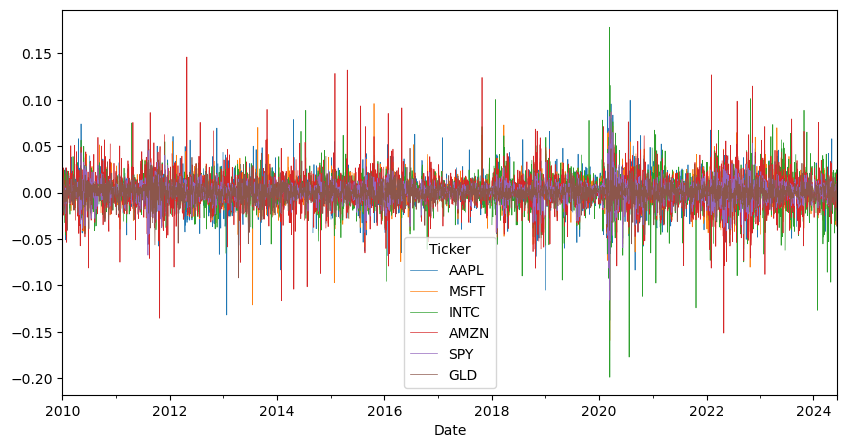

In [22]:
# 일간 수익률

rate_f_df[['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GLD']].plot(figsize=(10, 5), lw=0.5)

In [23]:
# 연율화
# 연간 영업일(약 252일로 계산)
# 252 = (통상적으로) 1년 영업률 

rate_f_df.mean() * 252

Ticker
AAPL        0.231637
AMZN        0.201635
EURUSD=X   -0.020328
GDX        -0.013078
GLD         0.038941
GS          0.096083
INTC        0.053507
MSFT        0.197104
SPY         0.128584
^SPX        0.110815
^VIX       -0.345063
^XAU       -0.013977
dtype: float64

In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif["vif_score"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["feature"] = features.columns    
    return vif

In [40]:
rate_f_df = rate_f_df.dropna()
get_vif(rate_f_df)

,vif_score,feature
0,2.003973,AAPL
1,1.688432,AMZN
2,1.005267,EURUSD=X
3,23.014819,GDX
4,2.392765,GLD
5,2.326585,GS
6,1.759425,INTC
7,2.626579,MSFT
8,402.728459,SPY
9,401.686511,^SPX


array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'EURUSD=X'}>],
       [<Axes: title={'center': 'GDX'}>, <Axes: title={'center': 'GLD'}>,
        <Axes: title={'center': 'GS'}>],
       [<Axes: title={'center': 'INTC'}>,
        <Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'SPY'}>],
       [<Axes: title={'center': '^SPX'}>,
        <Axes: title={'center': '^VIX'}>,
        <Axes: title={'center': '^XAU'}>]], dtype=object)

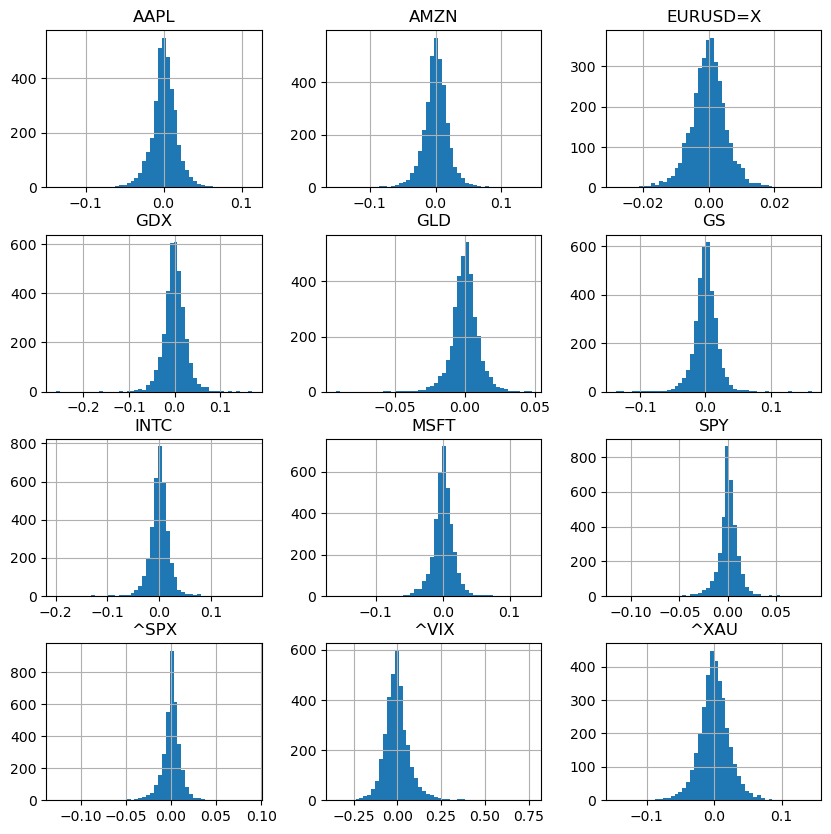

In [48]:
rate_f_df.hist(figsize = (10, 10), bins=50 )

<Axes: xlabel='Date'>

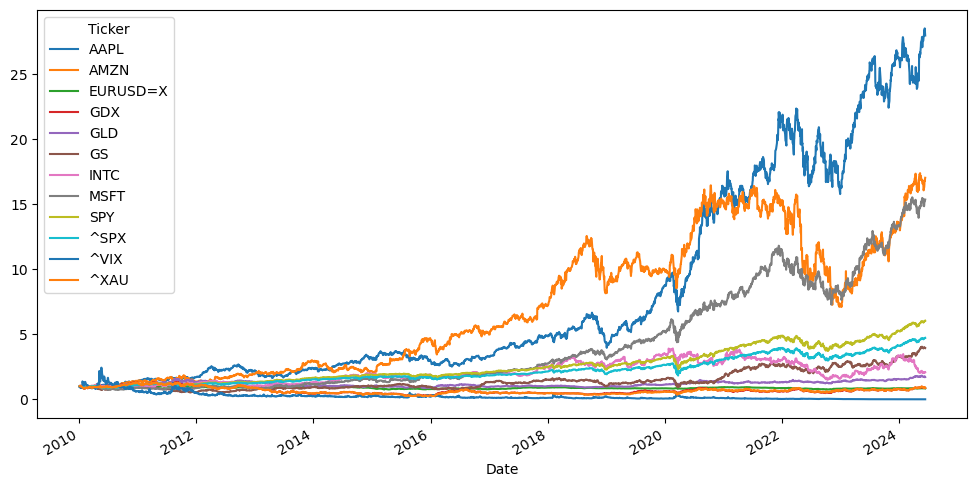

In [55]:
# 각 원소들의 누적합 : cumsum()
# 일간 수익률
rate_f_df.cumsum().apply(np.exp).plot(figsize=(12, 6))
plt.show()

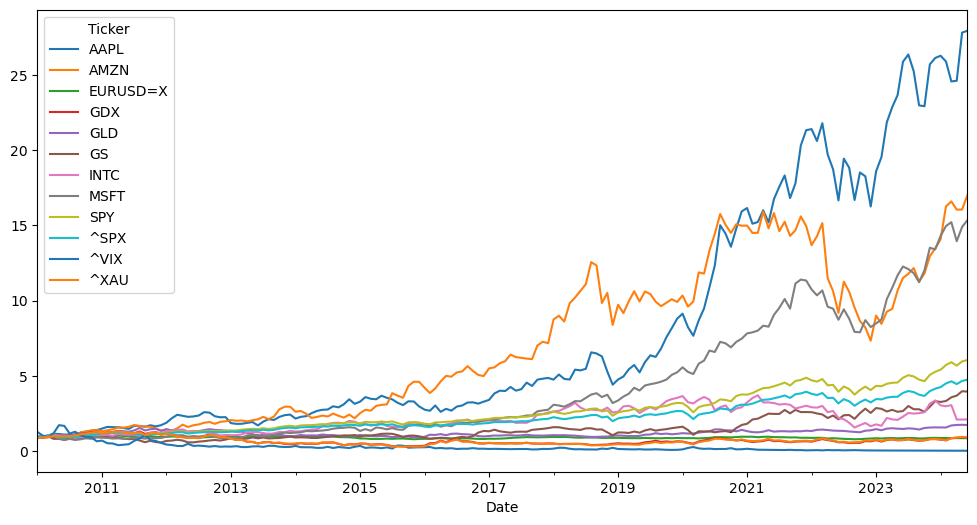

In [58]:
# 월간 수익률
rate_f_df.cumsum().apply(np.exp).resample('1m').last().plot(figsize=(12, 6))
plt.show()

In [61]:
amzn_df = f_df[['AMZN']].dropna()
amzn_df

Ticker,AMZN
Date,
2010-01-04,6.6950
2010-01-05,6.7345
2010-01-06,6.6125
2010-01-07,6.5000
2010-01-08,6.6760
...,...
2024-06-04,179.3400
2024-06-05,181.2800
2024-06-06,185.0000


In [63]:
window = 20

amzn_df['min'] = amzn_df['AMZN'].rolling(window=window).min()
amzn_df['mean'] = amzn_df['AMZN'].rolling(window=window).mean()
amzn_df['std'] = amzn_df['AMZN'].rolling(window=window).std()
amzn_df['median'] = amzn_df['AMZN'].rolling(window=window).median()
amzn_df['max'] = amzn_df['AMZN'].rolling(window=window).max()

amzn_df = amzn_df.dropna()
amzn_df

Ticker,AMZN,min,mean,std,median,max
Date,,,,,,
2010-02-01,5.9435,5.9435,6.349775,0.236046,6.36225,6.7345
2010-02-02,5.9060,5.9060,6.310325,0.241189,6.34400,6.7345
2010-02-03,5.9550,5.9060,6.271350,0.231837,6.31625,6.6760
2010-02-04,5.7970,5.7970,6.230575,0.240240,6.29525,6.6760
2010-02-05,5.8695,5.7970,6.199050,0.244358,6.27975,6.6760
...,...,...,...,...,...,...
2024-06-04,179.3400,176.4400,183.546500,3.689442,183.34500,189.5000
2024-06-05,181.2800,176.4400,183.172500,3.507785,183.14000,189.5000
2024-06-06,185.0000,176.4400,183.022500,3.351132,183.14000,189.5000


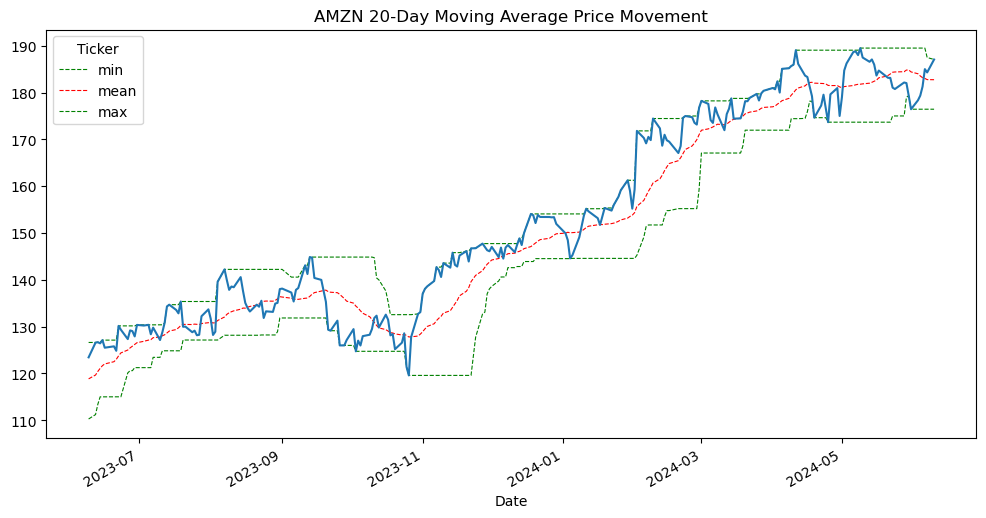

In [64]:
import matplotlib.pyplot as plt

ax = amzn_df[['min', 'mean', 'max']].iloc[-252:].plot(figsize= (12, 6), style=['g--','r--','g--'], lw=0.8)
amzn_df['AMZN'].iloc[-252:].plot(ax=ax)
plt.title("AMZN 20-Day Moving Average Price Movement")
plt.show()

In [69]:
# SMA(Simple Moving Average): 일정 기간동안의 가격의 평균을 나타내는 보조지표
# 1달 영업일을 21일로 가정, 1년 영업일을 252일로 가정

# 단기
amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
# 장기
amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term

amzn_df[['AMZN', 'SMA1', 'SMA2']].tail()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_40872/3785825841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['SMA1'] = amzn_df['AMZN'].rolling(window=21).mean() #short-term
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_40872/3785825841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['SMA2'] = amzn_df['AMZN'].rolling(window=252).mean() #long-term


Ticker,AMZN,SMA1,SMA2
Date,,,
2024-06-04,179.34,183.791905,151.816310
2024-06-05,181.28,183.438571,152.038452
2024-06-06,185.00,183.259524,152.270159
2024-06-07,184.30,183.083333,152.520437
2024-06-10,187.06,182.967143,152.769683


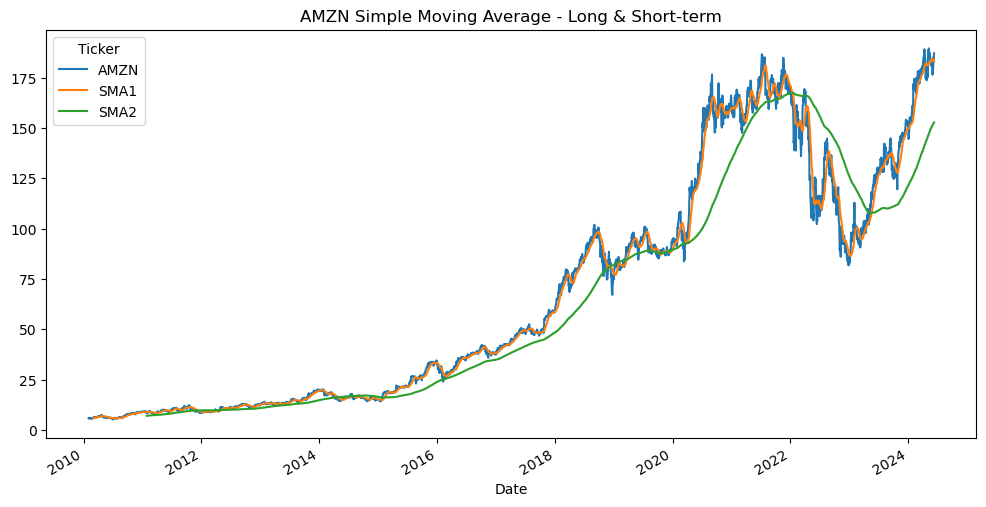

In [71]:
amzn_df[['AMZN', 'SMA1', 'SMA2']].plot(figsize=(12, 6))
plt.title("AMZN Simple Moving Average - Long & Short-term")
plt.show()

/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_40872/907941455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df.dropna(inplace=True)
/var/folders/f7/gl6wpvqx5z596rbpjsq5n3tc0000gn/T/ipykernel_40872/907941455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /


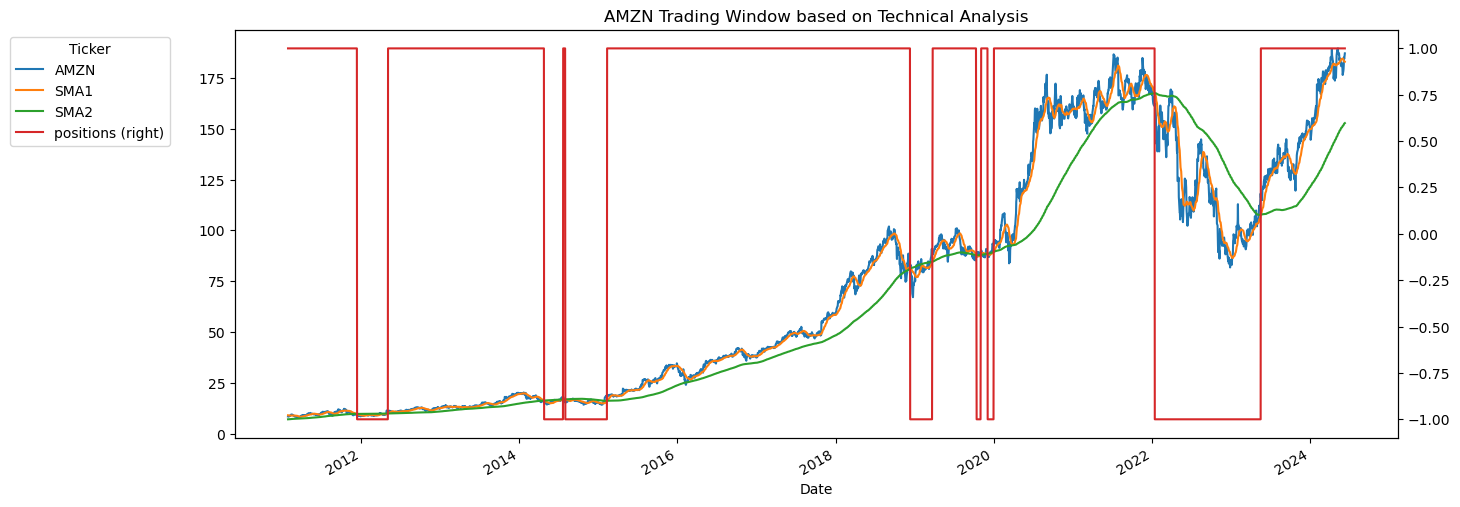

In [72]:
# 아마존 주가 기술 분석
# 골든 크로스, 데드 크로스
amzn_df.dropna(inplace=True)

amzn_df['positions'] = np.where(amzn_df['SMA1'] > amzn_df['SMA2'], 1, -1)  # 1: buy , -1: sell /

ax = amzn_df[['AMZN', 'SMA1', 'SMA2', 'positions']].plot(figsize=(15, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((-0.05, 1))

plt.title("AMZN Trading Window based on Technical Analysis")
plt.show()